In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [4]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

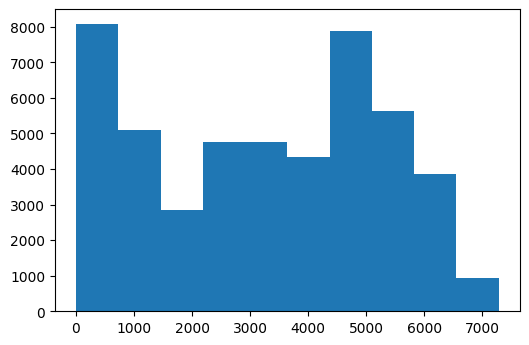

In [9]:
plt.hist(x='traffic_volume',data=df);

In [10]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [15]:
df['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [18]:
daytime = df[df['date_time'].dt.hour.between(7,19)]

In [28]:
nighttime = df[~df['date_time'].dt.hour.between(7,19)]

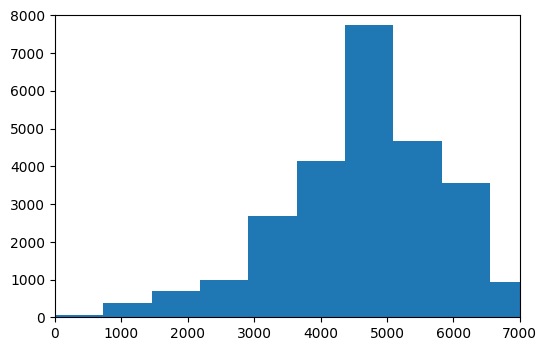

In [45]:
plt.hist(x=daytime['traffic_volume'])
plt.ylim(0,8000)
plt.xlim(0,7000);

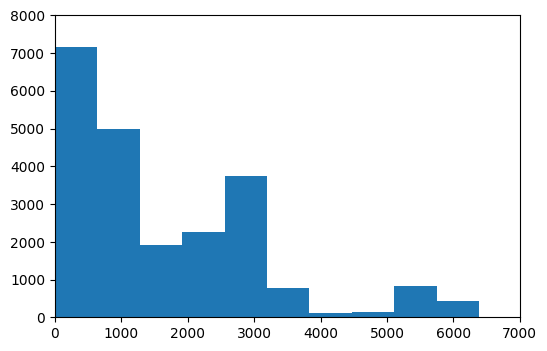

In [44]:
plt.hist(x=nighttime['traffic_volume'])
plt.ylim(0,8000)
plt.xlim(0,7000);

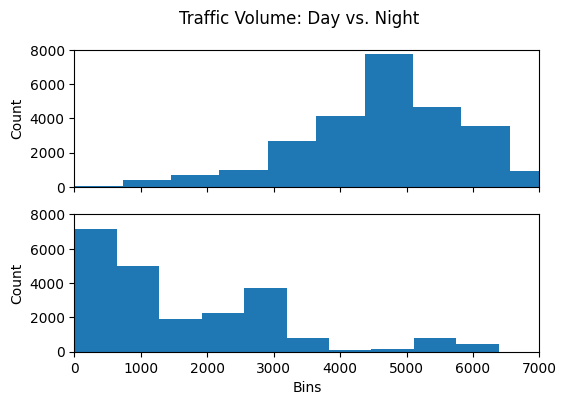

In [60]:
fig, (ax1, ax2) = plt.subplots(2,sharex=True, sharey=True)
fig.suptitle('Traffic Volume: Day vs. Night')
ax1.hist(x=daytime['traffic_volume'])
ax2.hist(x=nighttime['traffic_volume'])
plt.ylim(0,8000)
plt.xlim(0,7000)
ax1.set(ylabel='Count')
ax2.set(xlabel='Bins',ylabel='Count');

In [61]:
daytime['traffic_volume'].describe()

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [62]:
nighttime['traffic_volume'].describe()

count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64

In [63]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-63-7d784f045492>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

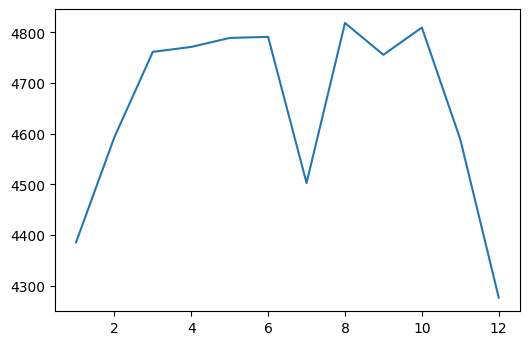

In [69]:
plt.plot(by_month['traffic_volume']);

In [70]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

<ipython-input-70-82743ff9829b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64

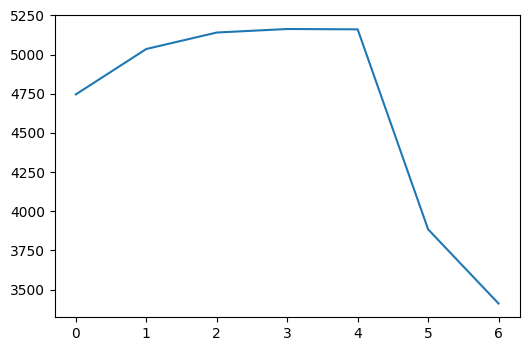

In [72]:
plt.plot(by_dayofweek['traffic_volume']);

In [78]:
daytime['hour'] = daytime['date_time'].dt.hour
business_days = daytime.copy()[daytime['dayofweek'] <= 4] 
weekend = daytime.copy()[daytime['dayofweek'] >= 5]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


<ipython-input-78-3ff0d5e97c34>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



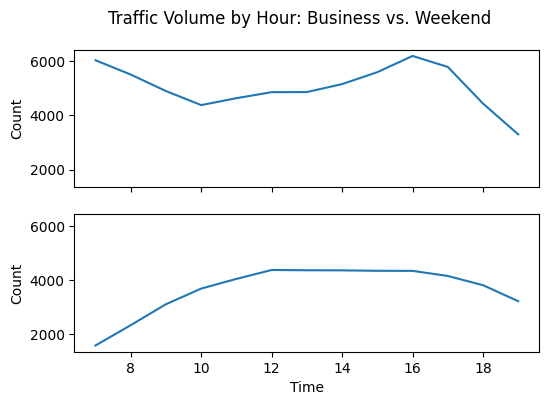

In [82]:
fig, (ax1, ax2) = plt.subplots(2,sharex=True, sharey=True)
fig.suptitle('Traffic Volume by Hour: Business vs. Weekend')
ax1.plot(by_hour_business['traffic_volume'])
ax2.plot(by_hour_weekend['traffic_volume'])
ax1.set(ylabel='Count')
ax2.set(xlabel='Time',ylabel='Count');

In [84]:
df.corr()['traffic_volume'].sort_values()

snow_1h           0.000733
rain_1h           0.004714
clouds_all        0.067054
temp              0.130299
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

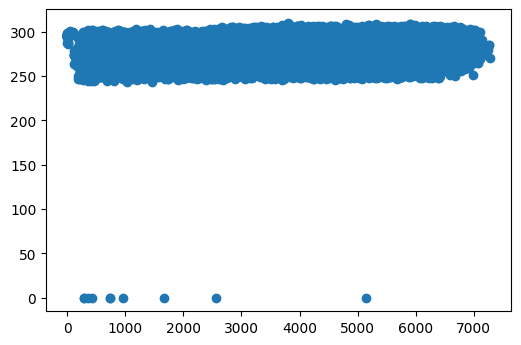

In [88]:
plt.scatter(x='traffic_volume',y='temp',data=df);

In [89]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

In [115]:
by_weather_main['traffic_volume']

weather_main
Clear           4661.666879
Clouds          4746.375927
Drizzle         4712.699060
Fog             4298.933511
Haze            4545.434932
Mist            4530.901782
Rain            4686.953503
Smoke           4447.307692
Snow            4295.594612
Squall          4211.000000
Thunderstorm    4512.479042
Name: traffic_volume, dtype: float64

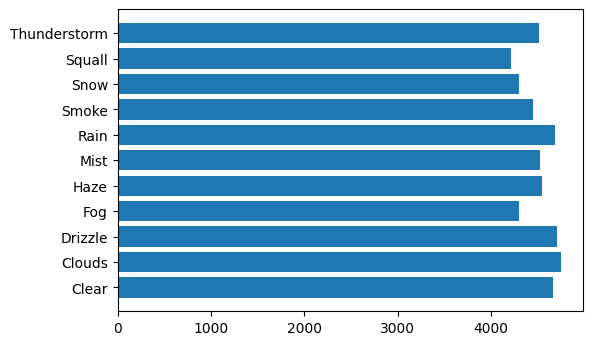

In [128]:
plt.barh(y=by_weather_main['traffic_volume'].index,width=by_weather_main['traffic_volume'].values);

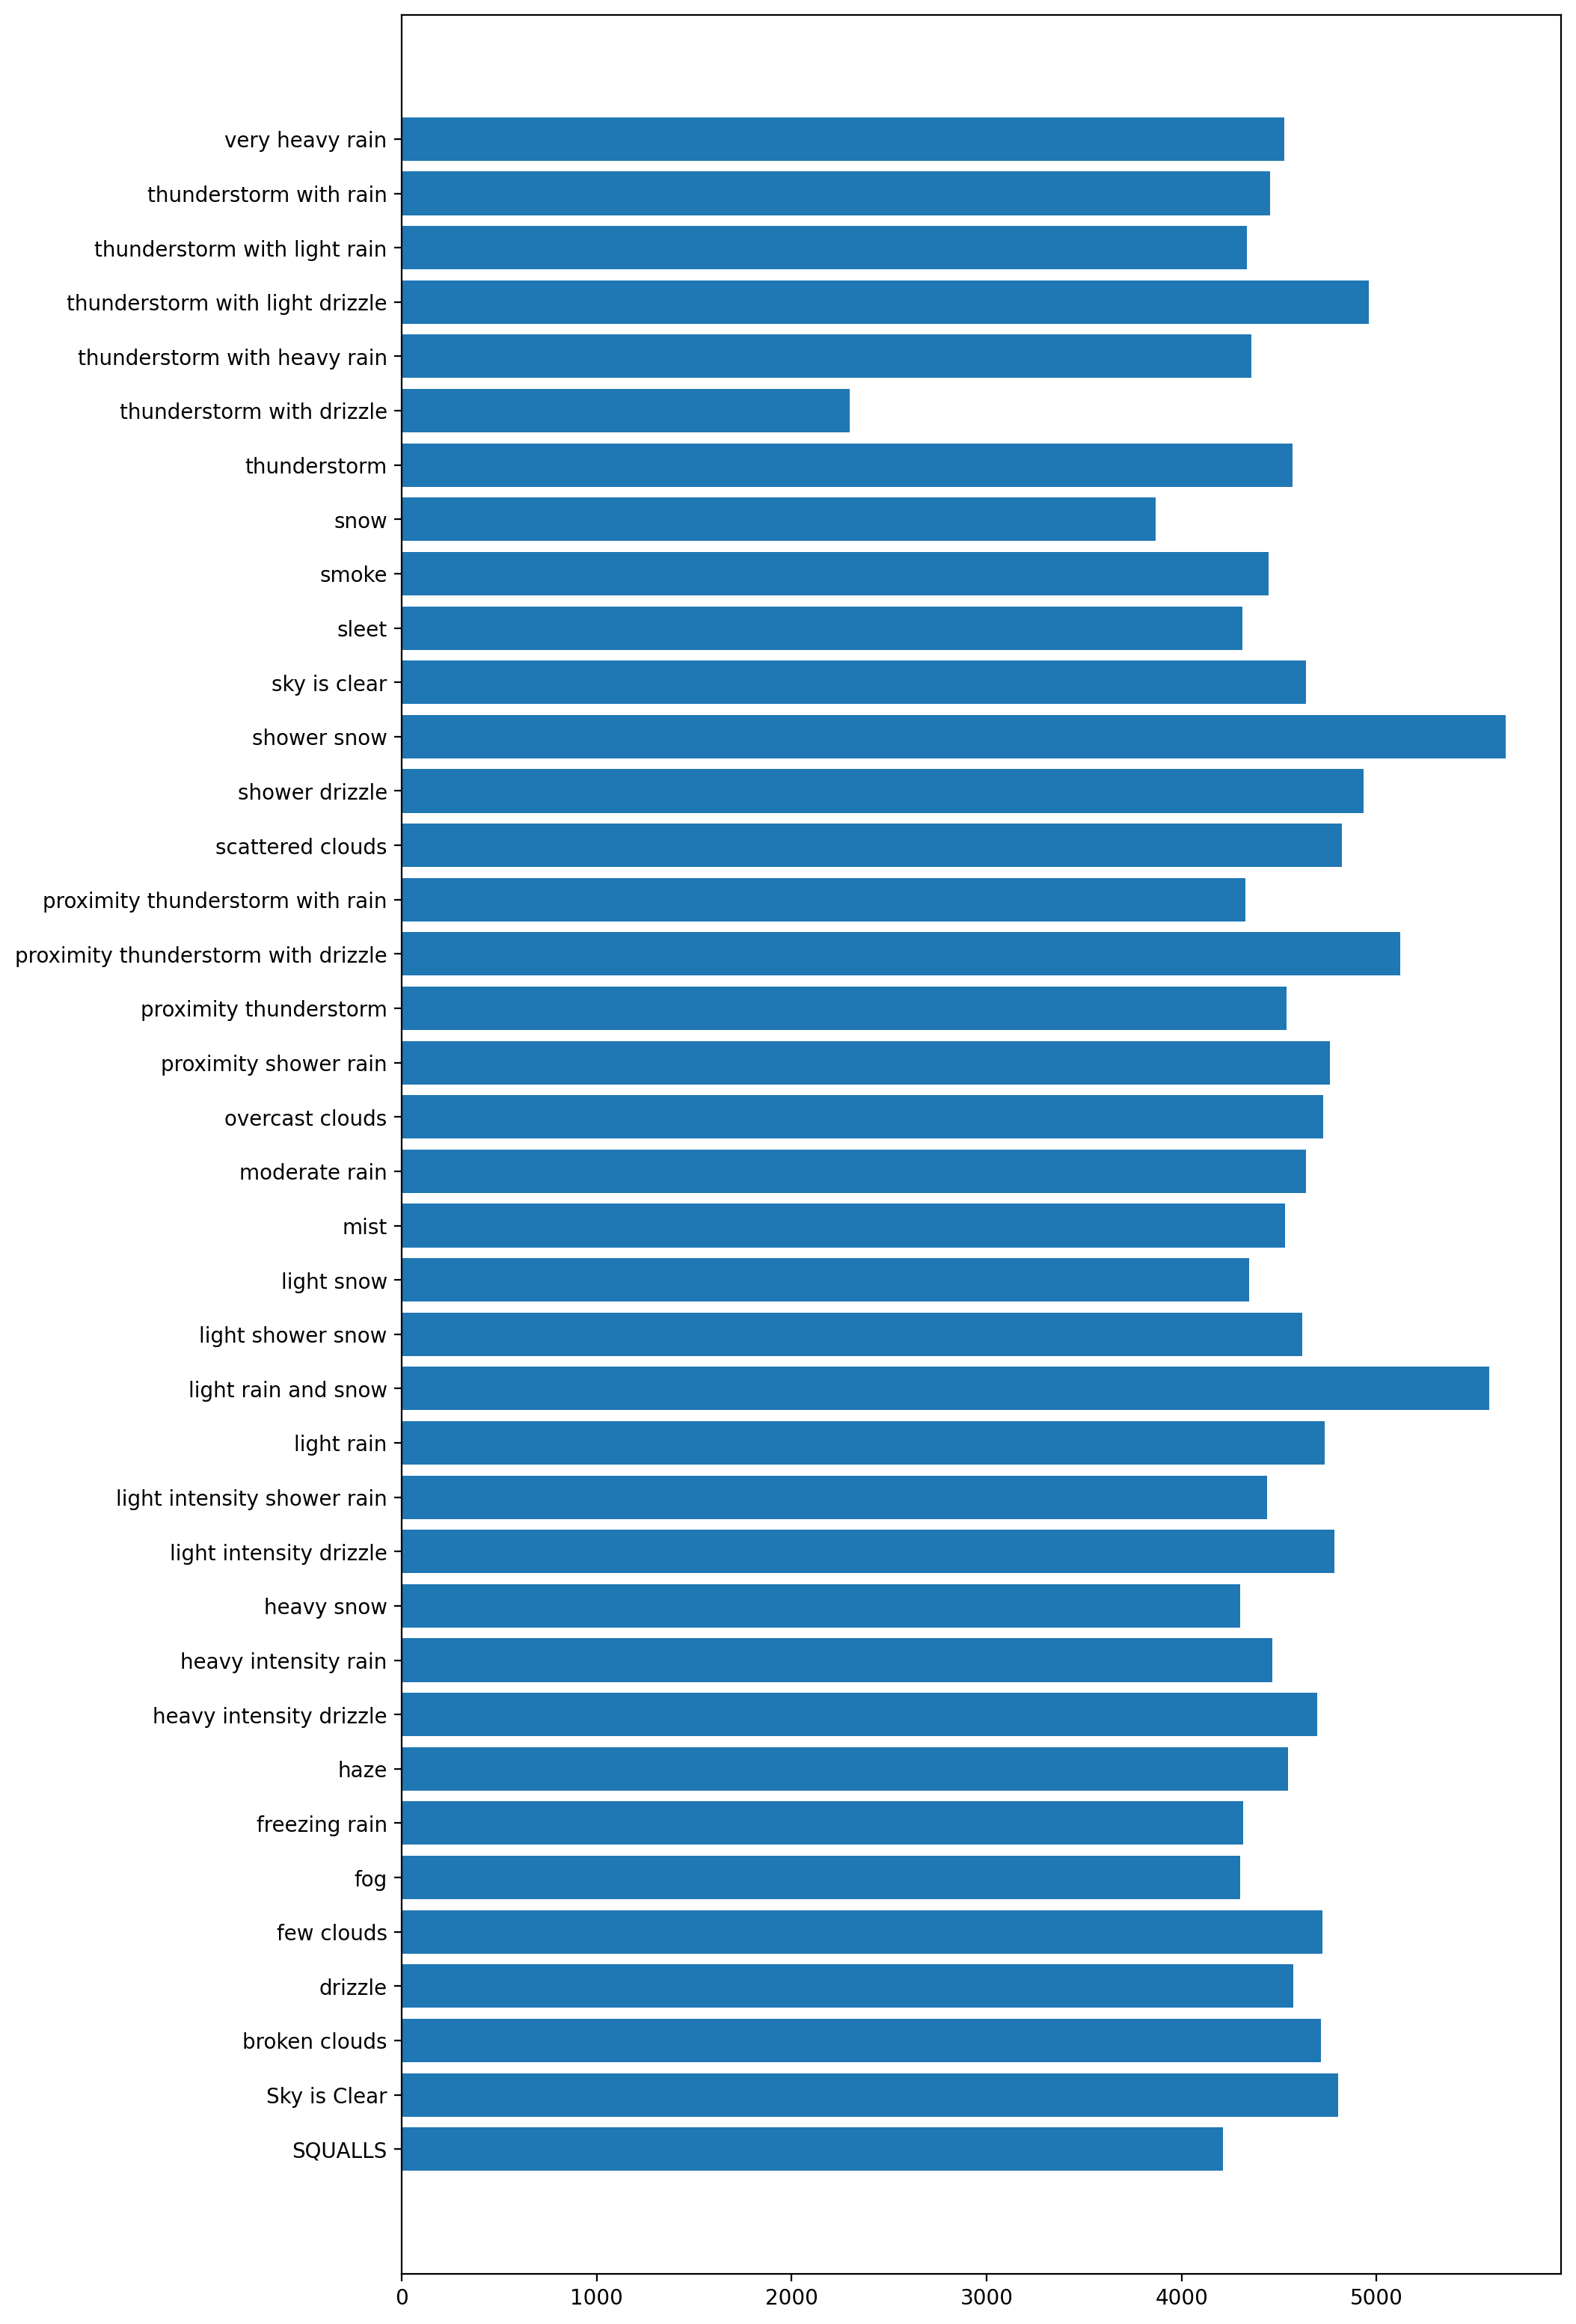

In [133]:
plt.figure(figsize=(10,20),dpi=200)
plt.barh(y=by_weather_description['traffic_volume'].index,width=by_weather_description['traffic_volume'].values);